Total Spending (Monthly): 193.63
Spending by Category: {'Food': 476.26, 'Transportation': 8.8, 'Entertainment': 646.7099999999999, 'Rent': 991.7099999999999, 'Health': 0, 'Miscellaneous': 137.93}
Highest Spending Category: Rent


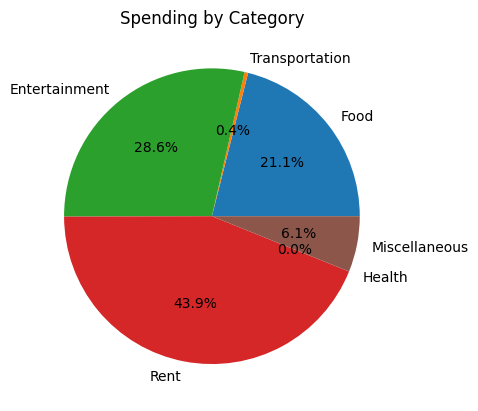

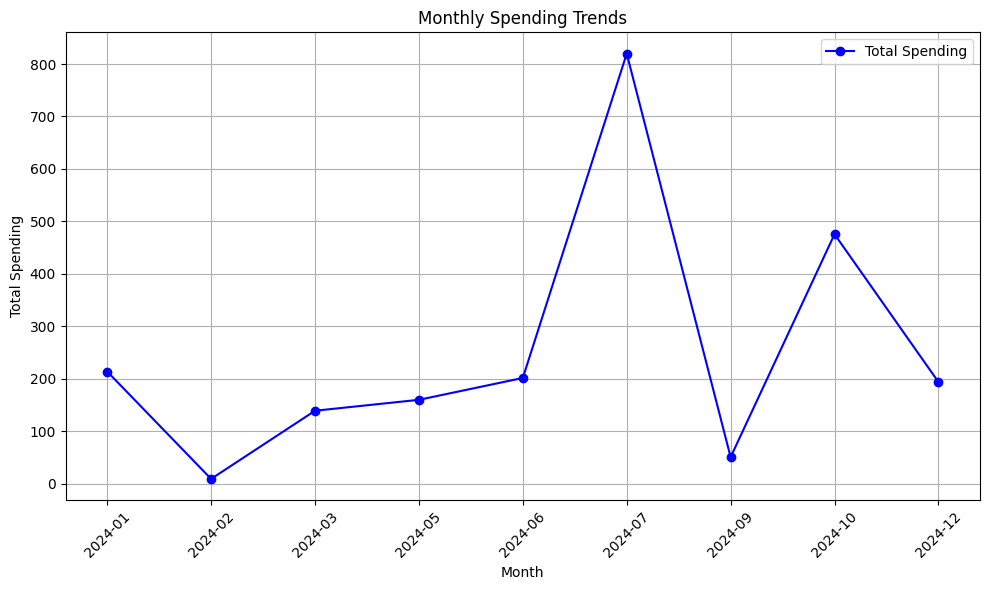

In [3]:
import csv
import sqlite3
import datetime
import matplotlib.pyplot as plt
import random

# Define categories
categories = ["Food", "Transportation", "Entertainment", "Rent", "Health", "Miscellaneous"]

# In-memory expense storage
expenses = []

# Expense Management Functions 
def add_expense(date, category, amount, description=""):
    if category not in categories:
        raise ValueError("Invalid category. Choose from predefined categories.")
    expenses.append({
        "date": date,
        "category": category,
        "amount": amount,
        "description": description
    })

def edit_expense(index, date=None, category=None, amount=None, description=None):
    if index < 0 or index >= len(expenses):
        raise IndexError("Expense index out of range.")
    if date:
        expenses[index]["date"] = date
    if category:
        expenses[index]["category"] = category
    if amount:
        expenses[index]["amount"] = amount
    if description:
        expenses[index]["description"] = description

def delete_expense(index):
    if index < 0 or index >= len(expenses):
        raise IndexError("Expense index out of range.")
    expenses.pop(index)

# File Storage Functions
def save_to_csv(file_name="expenses.csv"):
    with open(file_name, mode="w", newline="") as file:
        writer = csv.DictWriter(file, fieldnames=["date", "category", "amount", "description"])
        writer.writeheader()
        writer.writerows(expenses)

def load_from_csv(file_name="expenses.csv"):
    global expenses
    with open(file_name, mode="r") as file:
        reader = csv.DictReader(file)
        expenses = [row for row in reader]

# SQLite Database Functions 
def setup_database(db_name="expenses.db"):
    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS expenses (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            date TEXT,
            category TEXT,
            amount REAL,
            description TEXT
        )
    """)
    conn.commit()
    conn.close()

def add_expense_db(date, category, amount, description="", db_name="expenses.db"):
    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()
    cursor.execute("""
        INSERT INTO expenses (date, category, amount, description)
        VALUES (?, ?, ?, ?)
    """, (date, category, amount, description))
    conn.commit()
    conn.close()

# Summary and Report Functions
def total_spending(period="monthly"):
    now = datetime.datetime.now()
    if period == "monthly":
        return sum(float(exp["amount"]) for exp in expenses if exp["date"].startswith(f"{now.year}-{now.month:02d}"))

def spending_by_category():
    breakdown = {category: 0 for category in categories}
    for exp in expenses:
        breakdown[exp["category"]] += float(exp["amount"])
    return breakdown

def highest_spending_category():
    breakdown = spending_by_category()
    return max(breakdown, key=breakdown.get)

# Visualization Functions 
def plot_spending_by_category():
    breakdown = spending_by_category()
    labels = breakdown.keys()
    sizes = breakdown.values()
    plt.pie(sizes, labels=labels, autopct="%1.1f%%")
    plt.title("Spending by Category")
    plt.show()

def plot_monthly_trends():
    monthly_totals = {}
    for exp in expenses:
        month = exp["date"][:7]
        monthly_totals[month] = monthly_totals.get(month, 0) + float(exp["amount"])
    if not monthly_totals:
        print("No data available for plotting monthly trends.")
        return
    months = sorted(monthly_totals.keys())
    totals = [monthly_totals[month] for month in months]
    plt.figure(figsize=(10, 6))
    plt.plot(months, totals, marker="o", linestyle="-", color="b", label="Total Spending")
    plt.xlabel("Month")
    plt.ylabel("Total Spending")
    plt.title("Monthly Spending Trends")
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example Usage 
if __name__ == "__main__":
    # Add example expenses
    for _ in range(20):
        random_date = f"2024-{random.randint(1, 12):02d}-{random.randint(1, 28):02d}"
        random_category = random.choice(categories)
        random_amount = round(random.uniform(5, 200), 2)
        random_description = f"Random expense {random.randint(1, 100)}"
        add_expense(random_date, random_category, random_amount, random_description)

    # Save and load expenses
    save_to_csv()
    load_from_csv()

    # Summaries and Visualizations
    print("Total Spending (Monthly):", total_spending())
    print("Spending by Category:", spending_by_category())
    print("Highest Spending Category:", highest_spending_category())

    # Plot data
    plot_spending_by_category()
    plot_monthly_trends()